<a href="https://colab.research.google.com/github/skanda1005/Digit-Recognizer/blob/master/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

In [38]:
ds_train = pd.read_csv("/content/train.csv")
ds_test = pd.read_csv("/content/test.csv")

In [39]:
y_train=ds_train.pop('label')
x_train=ds_train

In [40]:
x_train = x_train.values.reshape(42000,28,28)
x_test = ds_test.values.reshape(28000, 28, 28)

In [41]:
x_train=x_train/255.0
x_test=x_test/255.0

In [42]:
x_train[1].shape

(28, 28)

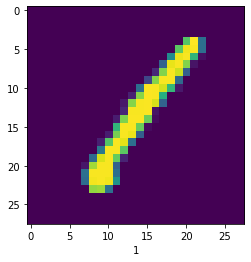

In [43]:
def show_img(i):
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
show_img(0)

In [44]:
x_train.shape, y_train.shape

((42000, 28, 28), (42000,))

In [45]:
x_train_orig=x_train.reshape(-1,28,28,1)
x_test_orig=x_test.reshape(-1,28,28,1)
y_train=np.array(y_train)
label=to_categorical(y_train)
label.shape

(42000, 10)

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [83]:
model=Sequential([
    Conv2D(32,(5,5) , activation='relu' , input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(5,5), activation ='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(64,(3,3), activation ='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [84]:
#callback = callbacks.EarlyStopping(monitor='loss', patience=5)

In [85]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [86]:
model.fit(x_train_orig, label, epochs=50, batch_size=64)

Epoch 1/50
657/657 [==============================] - 3s 4ms/step - loss: 1.0453 - accuracy: 0.8471
Epoch 2/50
657/657 [==============================] - 2s 4ms/step - loss: 0.5470 - accuracy: 0.9374
Epoch 3/50
657/657 [==============================] - 2s 4ms/step - loss: 0.4847 - accuracy: 0.9451
Epoch 4/50
657/657 [==============================] - 2s 4ms/step - loss: 0.4560 - accuracy: 0.9485
Epoch 5/50
657/657 [==============================] - 2s 4ms/step - loss: 0.4386 - accuracy: 0.9516
Epoch 6/50
657/657 [==============================] - 2s 4ms/step - loss: 0.4237 - accuracy: 0.9525
Epoch 7/50
657/657 [==============================] - 2s 4ms/step - loss: 0.4110 - accuracy: 0.9535
Epoch 8/50
657/657 [==============================] - 2s 4ms/step - loss: 0.4006 - accuracy: 0.9554
Epoch 9/50
657/657 [==============================] - 2s 4ms/step - loss: 0.3886 - accuracy: 0.9565
Epoch 10/50
657/657 [==============================] - 2s 4ms/step - loss: 0.3778 - accuracy: 0.9586

In [87]:
y_pred = model.predict(x_test_orig)

In [88]:
y_pred_class = np.argmax(y_pred, axis = 1)

In [89]:
submission_data = pd.read_csv('/content/sample_submission.csv')

In [90]:
submission_data['Label']=y_pred_class

In [91]:
submission_data.to_csv('submit2.csv' ,index=False)

In [65]:
def test_output(i):
  plt.imshow(x_train[i],cmap='gray')
  predicted=np.argmax(model.predict(x_train_orig[i].reshape(-1,28,28,1)))
  actual=np.argmax(label[i])
  plt.xlabel(f'predicted= {predicted}  Actual= {actual}')

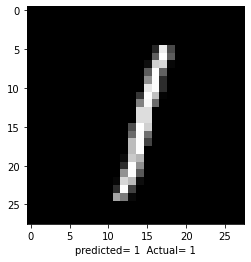

In [66]:
test_output(15)